In [106]:
!pip install xgboost

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [ ]:
#Applying tree pruning method or XGBoost method fo the prediction purpose

In [ ]:
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale and the % of high sale is 65.5%

In [2]:
#Q2 Fraud check

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale

In [3]:
fraud=pd.read_csv('Fraud_check.csv')

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [4]:
fraud=pd.get_dummies(fraud)

In [5]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [11]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Taxable.Income           600 non-null    int64
 1   City.Population          600 non-null    int64
 2   Work.Experience          600 non-null    int64
 3   Undergrad_NO             600 non-null    uint8
 4   Undergrad_YES            600 non-null    uint8
 5   Marital.Status_Divorced  600 non-null    uint8
 6   Marital.Status_Married   600 non-null    uint8
 7   Marital.Status_Single    600 non-null    uint8
 8   Urban_NO                 600 non-null    uint8
 9   Urban_YES                600 non-null    uint8
dtypes: int64(3), uint8(7)
memory usage: 18.3 KB


In [5]:
#we drop all those columns which we dont required like undergraduate,single,divorced and not urban we can remove

fraud1=fraud.drop('Undergrad_NO',axis=1)
fraud2=fraud1.drop('Marital.Status_Divorced',axis=1)
fraud3=fraud2.drop('Marital.Status_Single',axis=1)
fraud4=fraud3.drop('Urban_NO',axis=1)


KeyError: "['Undergrad_NO'] not found in axis"

In [134]:
fraud4

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Urban_YES
0,68833,50047,10,0,0,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,0,1
4,81002,27533,28,0,1,0
...,...,...,...,...,...,...
595,76340,39492,7,1,0,1
596,69967,55369,2,1,0,1
597,47334,154058,0,0,0,1
598,98592,180083,17,1,1,0


In [135]:
fraud4=fraud4.rename({'Taxable.Income':'TaxIn','City.Population':'CP','Work.Experience':'WE',},axis=1)

In [136]:
fraud4

,TaxIn,CP,WE,Undergrad_YES,Marital.Status_Married,Urban_YES
0,68833,50047,10,0,0,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,0,1
4,81002,27533,28,0,1,0
...,...,...,...,...,...,...
595,76340,39492,7,1,0,1
596,69967,55369,2,1,0,1
597,47334,154058,0,0,0,1
598,98592,180083,17,1,1,0


In [137]:
fraud5=fraud4.TaxIn.map(lambda x: 'risk'if x<=30000 else 'good')

In [139]:
fraud6=pd.concat([fraud4,fraud5],axis=1)

In [140]:
fraud6

,TaxIn,CP,WE,Undergrad_YES,Marital.Status_Married,Urban_YES,TaxIn
0,68833,50047,10,0,0,1,good
1,33700,134075,18,1,0,1,good
2,36925,160205,30,0,1,1,good
3,50190,193264,15,1,0,1,good
4,81002,27533,28,0,1,0,good
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,1,good
596,69967,55369,2,1,0,1,good
597,47334,154058,0,0,0,1,good
598,98592,180083,17,1,1,0,good


In [144]:
fraudfilt=pd.get_dummies(fraud6)

In [146]:
fraudfilt

,TaxIn,CP,WE,Undergrad_YES,Marital.Status_Married,Urban_YES,TaxIn_good,TaxIn_risk
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,1,1,0
2,36925,160205,30,0,1,1,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,1,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,1,1,0
596,69967,55369,2,1,0,1,1,0
597,47334,154058,0,0,0,1,1,0
598,98592,180083,17,1,1,0,1,0


In [147]:
fraud7=fraudfilt.drop('TaxIn',axis=1)

In [148]:
fraud7

,CP,WE,Undergrad_YES,Marital.Status_Married,Urban_YES,TaxIn_good,TaxIn_risk
0,50047,10,0,0,1,1,0
1,134075,18,1,0,1,1,0
2,160205,30,0,1,1,1,0
3,193264,15,1,0,1,1,0
4,27533,28,0,1,0,1,0
...,...,...,...,...,...,...,...
595,39492,7,1,0,1,1,0
596,55369,2,1,0,1,1,0
597,154058,0,0,0,1,1,0
598,180083,17,1,1,0,1,0


In [150]:
fraud_new=fraud7.drop('TaxIn_good',axis=1)

In [151]:
fraud_new

,CP,WE,Undergrad_YES,Marital.Status_Married,Urban_YES,TaxIn_risk
0,50047,10,0,0,1,0
1,134075,18,1,0,1,0
2,160205,30,0,1,1,0
3,193264,15,1,0,1,0
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,1,0
596,55369,2,1,0,1,0
597,154058,0,0,0,1,0
598,180083,17,1,1,0,0


In [153]:
y=fraud_new.iloc[:,5]

In [154]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TaxIn_risk, Length: 600, dtype: uint8

In [155]:
x=fraud_new.iloc[:,[0,1,2,3,4]]

In [156]:
x

,CP,WE,Undergrad_YES,Marital.Status_Married,Urban_YES
0,50047,10,0,0,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [132]:
# we apply train test classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [123]:
#prepare model of decisiontreeclassifier using criteria entropy 

model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [124]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(195.71029411764707, 199.32, 'X[4] <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [159, 161]'),
 Text(128.01176470588237, 163.07999999999998, 'X[7] <= 0.5\nentropy = 0.966\nsamples = 237\nvalue = [93, 144]'),
 Text(78.7764705882353, 126.83999999999999, 'X[4] <= 105.5\nentropy = 0.999\nsamples = 191\nvalue = [92, 99]'),
 Text(39.38823529411765, 90.6, 'X[5] <= 68.5\nentropy = 0.874\nsamples = 85\nvalue = [25, 60]'),
 Text(19.694117647058825, 54.359999999999985, 'X[2] <= 8.5\nentropy = 0.704\nsamples = 68\nvalue = [13, 55]'),
 Text(9.847058823529412, 18.119999999999976, 'entropy = 0.893\nsamples = 42\nvalue = [13, 29]'),
 Text(29.541176470588237, 18.119999999999976, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(59.082352941176474, 54.359999999999985, 'X[4] <= 79.5\nentropy = 0.874\nsamples = 17\nvalue = [12, 5]'),
 Text(49.23529411764706, 18.119999999999976, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(68.92941176470589, 18.119999999999976, 'entropy = 0.592\nsamples

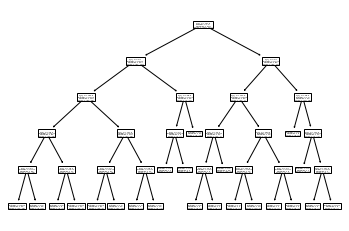

In [125]:
tree.plot_tree(model)

[Text(310.0, 1107.3333333333333, 'CP <= 28297.0\nentropy = 0.75\nsamples = 480\nvalue = [377, 103]\nclass = risk'),
 Text(155.0, 906.0, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = risk'),
 Text(465.0, 906.0, 'CP <= 28452.5\nentropy = 0.755\nsamples = 474\nvalue = [371, 103]\nclass = risk'),
 Text(310.0, 704.6666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(620.0, 704.6666666666666, 'CP <= 28990.0\nentropy = 0.752\nsamples = 473\nvalue = [371, 102]\nclass = risk'),
 Text(465.0, 503.33333333333326, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = risk'),
 Text(775.0, 503.33333333333326, 'CP <= 29354.0\nentropy = 0.758\nsamples = 466\nvalue = [364, 102]\nclass = risk'),
 Text(620.0, 302.0, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(930.0, 302.0, 'CP <= 31237.0\nentropy = 0.755\nsamples = 465\nvalue = [364, 101]\nclass = risk'),
 Text(775.0, 100.66666666666652, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = risk'),


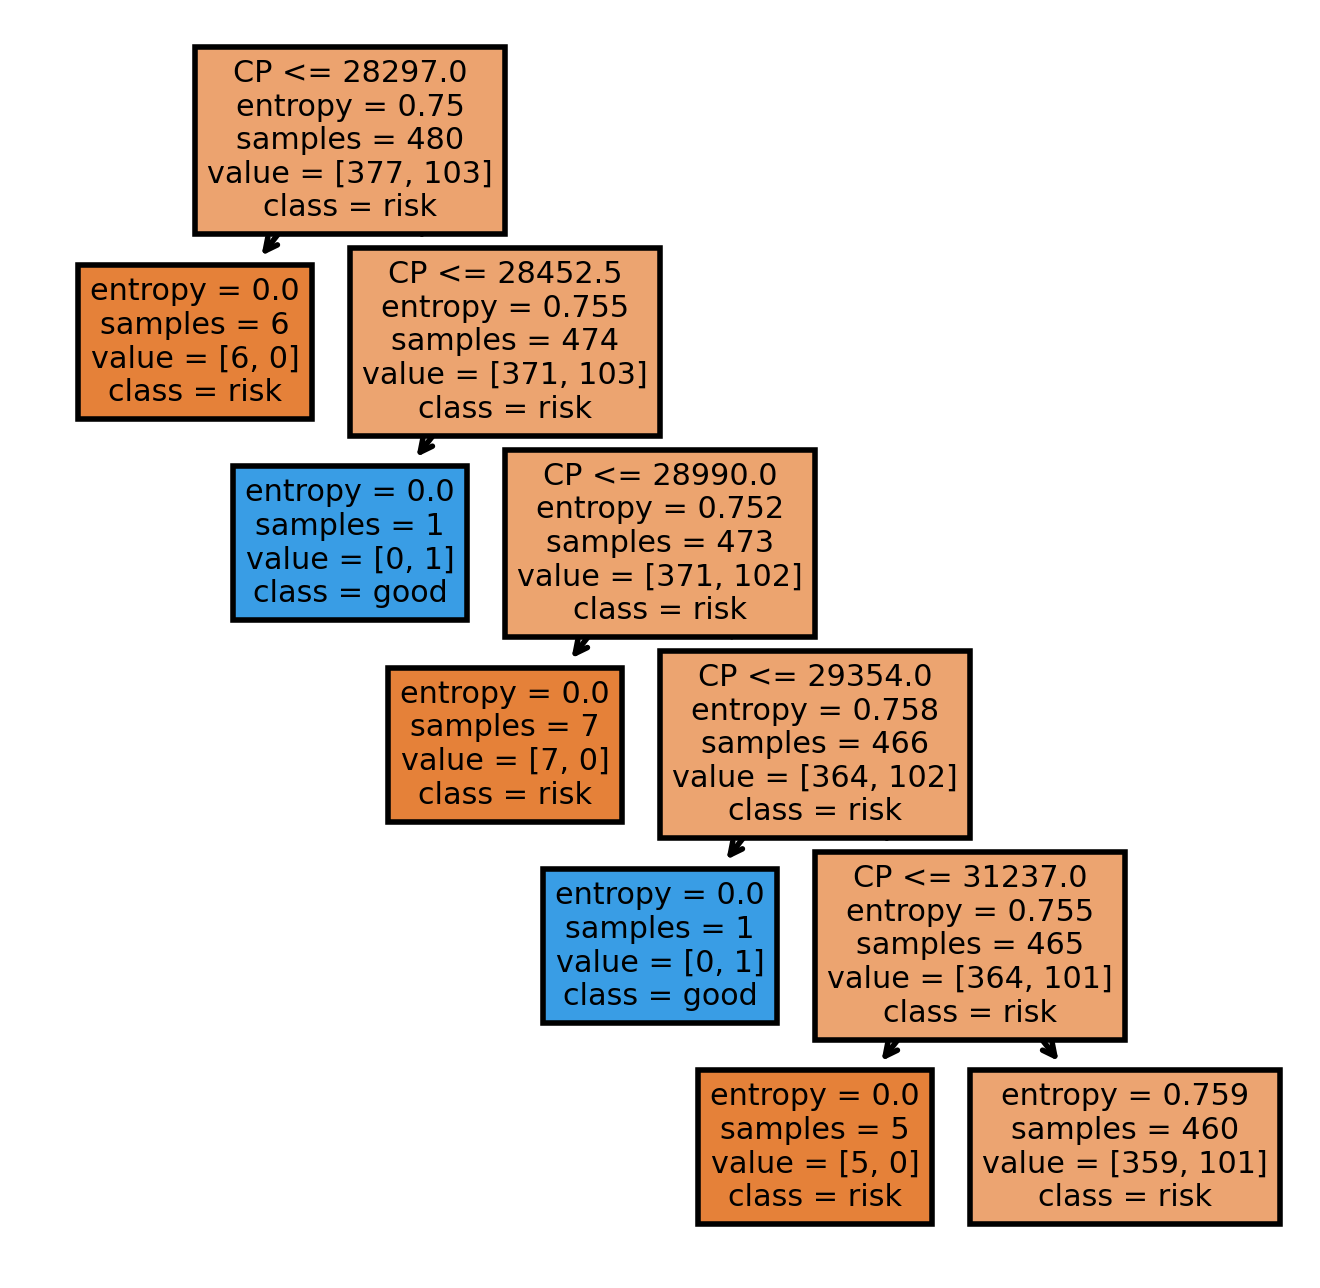

In [162]:
fn=['CP','WE','Undergrad_yes','Marital.Status_Married','Urban_YES']
cn=['risk','good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=400)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True)

In [126]:
pred=model.predict(x_test)

In [127]:
pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=uint8)

In [165]:
pd.Series(pred).value_counts()

0    119
1      1
dtype: int64

In [166]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [167]:
pd.crosstab(y_test,pred)

col_0,0,1
TaxIn_risk,,
0,98,1
1,21,0


In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CP                      600 non-null    int64
 1   WE                      600 non-null    int64
 2   Undergrad_YES           600 non-null    uint8
 3   Marital.Status_Married  600 non-null    uint8
 4   Urban_YES               600 non-null    uint8
dtypes: int64(2), uint8(3)
memory usage: 11.3 KB


In [169]:
np.mean(pred==y_test) # we got 81.66% of accuracy in data.

0.8166666666666667

In [128]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [129]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [176]:
preds=model2.predict(x_test)

In [177]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [178]:
pd.crosstab(y_test,preds)

col_0,0,1
TaxIn_risk,,
0,95,4
1,21,0


In [179]:
np.mean(preds==y_test)

0.7916666666666666

In [115]:
# Applying XGboost in Fraud_check dataset

model_x=XGBClassifier()
model_x.fit(x_train,y_train)
y_pred=model_x.predict(x_test)
predictions=[round(value) for value in y_pred]
accuracy=accuracy_score(y_pred,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# it gives accuracy less than previous model.

In [180]:
#Q1 Company dataset

comp=pd.read_csv('Company_Data.csv')

In [181]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [182]:
comp.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [183]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [187]:
comp['Sales'].mean()

7.496325

In [198]:
comp1['sales']=comp.Sales.map(lambda x: 'High' if x>7.5 else 'low')

In [202]:
comp1['sales']

0      High
1      High
2      High
3       low
4       low
       ... 
395    High
396     low
397     low
398     low
399    High
Name: Sales, Length: 400, dtype: object

In [190]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [206]:
comp_new=pd.concat([comp,comp1['sales']],axis=1)

In [207]:
comp_new

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [208]:
comp_new=pd.get_dummies(comp_new)

In [209]:
comp_new

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_High,Sales_low
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1,0
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1,0
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1,0
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1,0
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0,1


In [211]:
comp_new=comp_new.drop('Sales',axis=1)

In [212]:
comp_new

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_High,Sales_low
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0,1


In [213]:
comp_new1=comp_new.drop('Sales_low',axis=1)
comp_new2=comp_new1.drop('US_No',axis=1)
comp_new3=comp_new2.drop('Urban_No',axis=1)
# these values wont effect much to the datasets so we can remove then as an outliers.

In [214]:
comp_new3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_High
0,138,73,11,276,120,42,17,1,0,0,1,1,1
1,111,48,16,260,83,65,10,0,1,0,1,1,1
2,113,35,10,269,80,59,12,0,0,1,1,1,1
3,117,100,4,466,97,55,14,0,0,1,1,1,0
4,141,64,3,340,128,38,13,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,1,1,1
396,139,23,3,37,120,55,11,0,0,1,0,1,0
397,162,26,12,368,159,40,18,0,0,1,1,1,0
398,100,79,7,284,95,50,12,1,0,0,1,1,0


In [217]:
x=comp_new3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

In [218]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,1,0,0,1,1
1,111,48,16,260,83,65,10,0,1,0,1,1
2,113,35,10,269,80,59,12,0,0,1,1,1
3,117,100,4,466,97,55,14,0,0,1,1,1
4,141,64,3,340,128,38,13,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,1,1
396,139,23,3,37,120,55,11,0,0,1,0,1
397,162,26,12,368,159,40,18,0,0,1,1,1
398,100,79,7,284,95,50,12,1,0,0,1,1


In [219]:
y=comp_new3.iloc[:,12]

In [220]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_High, Length: 400, dtype: uint8

In [103]:
#using split method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [104]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [105]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(153.45000000000002, 190.26, 'X[4] <= 88.5\nentropy = 0.999\nsamples = 320\nvalue = [165, 155]'),
 Text(83.7, 135.9, 'X[1] <= 46.0\nentropy = 0.196\nsamples = 33\nvalue = [1, 32]'),
 Text(55.800000000000004, 81.53999999999999, 'X[7] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(223.20000000000002, 135.9, 'X[8] <= 0.5\nentropy = 0.985\nsamples = 287\nvalue = [164, 123]'),
 Text(167.4, 81.53999999999999, 'X[4] <= 126.5\nentropy = 0.925\nsamples = 232\nvalue = [153, 79]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.995\nsamples = 149\nvalue = [81, 68]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.564\nsamples = 83\nvalue = [72, 11]'),
 Text(279.0, 81.53999999999999, 'X[4] <= 132.5\nentropy = 0.722\nsa

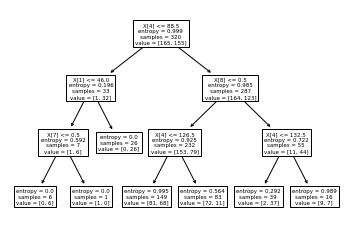

In [227]:
tree.plot_tree(model1)

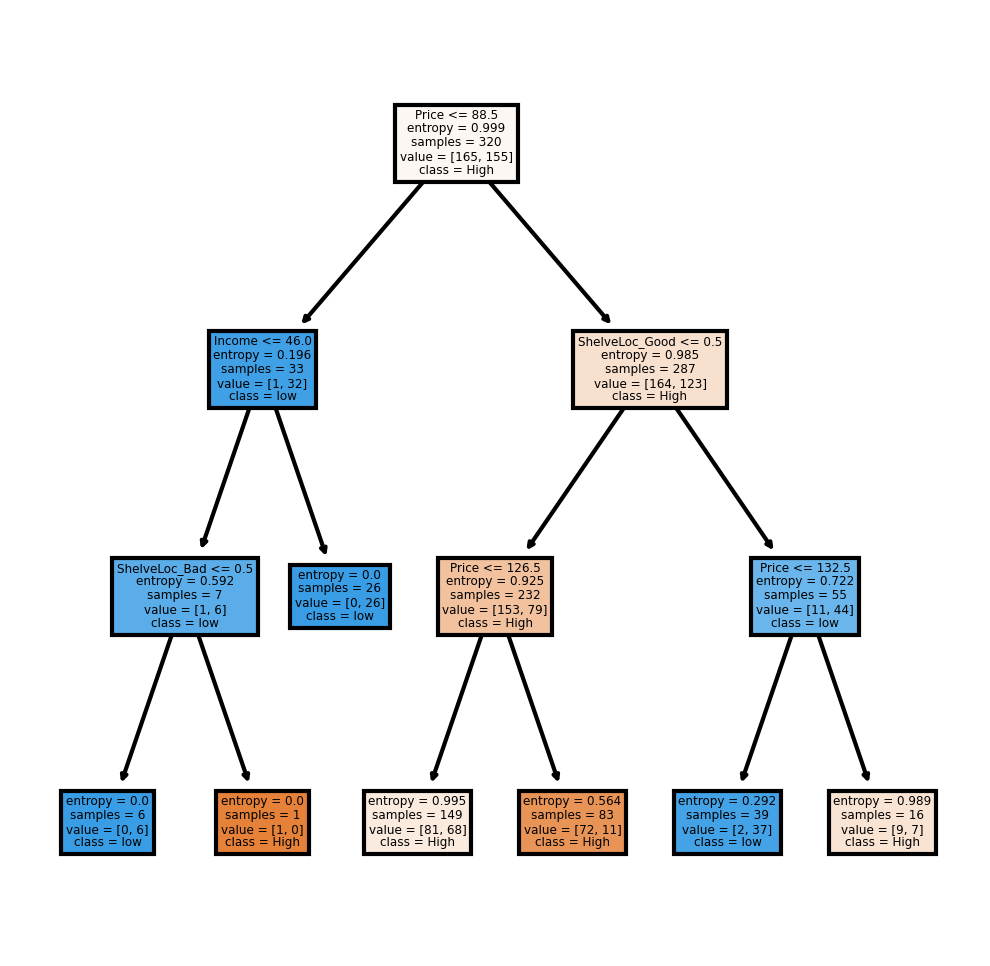

In [230]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes','US_Yes']
cn=['High','low']
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(4,4), dpi=300)
tree.plot_tree(model1,feature_names=fn,
              class_names=cn,
              filled=True);
    

In [234]:
preds=model1.predict(x_test)
pd.Series(preds).value_counts()

0    59
1    21
dtype: int64

In [235]:
preds

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [236]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_High,,
0,36,1
1,23,20


In [237]:
# diagonal values  are case of correct match


In [238]:
np.mean(y_test==preds)

0.7

In [239]:
#70% accuracu

In [241]:
# trying gini model for more accuracy
model2=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [242]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(189.42631578947368, 199.32, 'X[8] <= 0.5\ngini = 0.5\nsamples = 320\nvalue = [165, 155]'),
 Text(101.32105263157895, 163.07999999999998, 'X[4] <= 105.5\ngini = 0.478\nsamples = 255\nvalue = [154, 101]'),
 Text(44.05263157894737, 126.83999999999999, 'X[5] <= 68.5\ngini = 0.447\nsamples = 86\nvalue = [29, 57]'),
 Text(26.431578947368422, 90.6, 'X[2] <= 8.5\ngini = 0.36\nsamples = 68\nvalue = [16, 52]'),
 Text(17.621052631578948, 54.359999999999985, 'X[1] <= 29.5\ngini = 0.476\nsamples = 41\nvalue = [16, 25]'),
 Text(8.810526315789474, 18.119999999999976, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(26.431578947368422, 18.119999999999976, 'gini = 0.438\nsamples = 37\nvalue = [12, 25]'),
 Text(35.242105263157896, 54.359999999999985, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(61.67368421052632, 90.6, 'X[4] <= 85.5\ngini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(70.484210526315

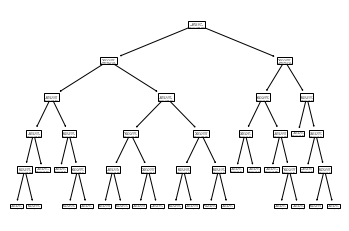

In [243]:
tree.plot_tree(model2)

In [251]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes','US_Yes']
cn=['High','low']
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(10,10), dpi=1000)
tree.plot_tree(model2,feature_names=fn,
              class_names=cn,
              filled=True);

In [245]:
preds2=model2.predict(x_test)
pd.Series(preds2).value_counts()

0    40
1    40
dtype: int64

In [246]:
#accuracy
np.mean(preds2==y_test)

0.7125

In [6]:
#it gives 71% of accuracy more than the entropy method.

In [ ]:
#Q2      Applying XGBoost method for prediction purpose 

In [7]:
!pip install xgboost

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [13]:
Comp=pd.read_csv('Company_Data.csv')

In [15]:
Comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [16]:
Comp.corr()#finding correlation and decide which feature we can remove

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [17]:
Comp=pd.get_dummies(Comp)

In [18]:
Comp

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [47]:
comp1=Comp.Sales.map(lambda x: 'High' if x>7.5 else 'low')

In [48]:
comp1

0      High
1      High
2      High
3       low
4       low
       ... 
395    High
396     low
397     low
398     low
399    High
Name: Sales, Length: 400, dtype: object

In [49]:
Comp_new=pd.concat([Comp,comp1],axis=1)

In [53]:
Comp_new=Comp_new.drop('Sales',axis=1)

In [54]:
Comp_new

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,low
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,low
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,low
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,low


In [55]:
Comp_new1=pd.get_dummies(Comp_new)

In [56]:
Comp_new1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales_High,sales_low
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0,1


In [57]:
Comp_new2=Comp_new1.drop('ShelveLoc_Bad',axis=1)
Comp_new3=Comp_new2.drop('Urban_No',axis=1)
Comp_new4=Comp_new3.drop('US_No',axis=1)
Comp_new5=Comp_new4.drop('sales_low',axis=1)

In [58]:
Comp_new5

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_High
0,138,73,11,276,120,42,17,0,0,1,1,1
1,111,48,16,260,83,65,10,1,0,1,1,1
2,113,35,10,269,80,59,12,0,1,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1,0
4,141,64,3,340,128,38,13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1,1
396,139,23,3,37,120,55,11,0,1,0,1,0
397,162,26,12,368,159,40,18,0,1,1,1,0
398,100,79,7,284,95,50,12,0,0,1,1,0


In [59]:
Comp_new5.corr() # all fearture colimns are independent with each other

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_High
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.026386,0.008683,0.066594,0.016869,0.030673
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.012657,-0.051392,0.037967,0.089601,0.130559
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.056149,-0.015929,0.042035,0.684460,0.256914
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.007789,-0.040640,-0.052025,0.060564,0.074759
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.045854,-0.006607,0.047016,0.057861,-0.387046
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.022818,0.056613,0.028479,0.008652,-0.183524
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.029188,0.013242,-0.033094,-0.078250,-0.032861
ShelveLoc_Good,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,1.000000,-0.571396,-0.039197,0.078864,0.365781
ShelveLoc_Medium,0.008683,-0.051392,-0.015929,-0.040640,-0.006607,0.056613,0.013242,-0.571396,1.000000,-0.037391,-0.065656,-0.054298
Urban_Yes,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.039197,-0.037391,1.000000,0.047085,-0.050327


In [61]:
x=Comp_new5.iloc[:,0:11]

In [62]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [63]:
y=Comp_new5.iloc[:,11]

In [64]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales_High, Length: 400, dtype: uint8

In [65]:
# splitting by train test method

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=3)

In [66]:
model=XGBClassifier() # in this cross validation technique works internally
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred=model.predict(x_test)

In [68]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
      dtype=uint8)

In [69]:
predictions=[round(value) for value in y_pred] # round

In [70]:
predictions

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0]

In [71]:
accuracy=accuracy_score(y_test,predictions)

In [73]:
accuracy

0.8257575757575758

In [74]:
print("accuracy: %.2f%%" %(accuracy*100.0))

accuracy: 82.58%


In [76]:
#if we want to change the accuracy of a model of XGB than we havw to make some changes in it

model2=XGBClassifier(learning_rate=0.7,max_depth=10,random_state=3)
model2.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred2=model2.predict(x_test)

In [78]:
y_pred2

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
      dtype=uint8)

In [80]:
predictions2=[round(value) for value in y_pred2]

In [82]:
predictions2

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0]

In [83]:
accuracy=accuracy_score(y_test,predictions2)

In [84]:
print("accuracy:%.2f%%" %(accuracy*100.0))

accuracy:76.52%


In [85]:
# no use of increasing the values inside the XGBClassifier

In [88]:
model3=XGBClassifier(learning_rate=0.1,max_depth=10,random_state=1)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
prediction3=[round(value) for value in y_pred3]
accuracy3=accuracy_score(y_test,prediction3)
print("accuracy3: %.2f%%" % (accuracy*100.0))

[13:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy3: 76.52%


In [89]:
# no need to change the values

In [101]:
# finding RSME
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.417424


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from matplotlib import pyplot

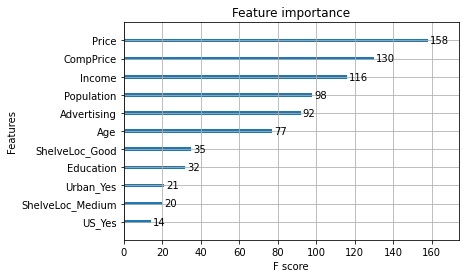

In [98]:
plot_importance(model)
pyplot.show()

In [102]:
# here we prepare the model of xgboost and find out thge accuracy 82.58% and from graph we can say that the for high sales the price is the main factor.

In [ ]:
#Q2 of Fraud_check dataset

In [134]:
fraud=pd.read_csv('Fraud_check.csv')

In [135]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [139]:
fraud=fraud.rename({'Marital.Status':'MS','Taxable.Income':'TI','City.Population':'CP','Work.Experience':'WE'},axis=1)

In [140]:
fraud

,Undergrad,MS,TI,CP,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [148]:
fraud1['ti']=fraud.TI.map(lambda x: 'risk' if x<=30000 else 'good')

In [155]:
fraud2=pd.concat([fraud1['ti'],fraud],axis=1)

In [156]:
fraud2

,TI,Undergrad,MS,TI,CP,WE,Urban
0,good,NO,Single,68833,50047,10,YES
1,good,YES,Divorced,33700,134075,18,YES
2,good,NO,Married,36925,160205,30,YES
3,good,YES,Single,50190,193264,15,YES
4,good,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...,...
595,good,YES,Divorced,76340,39492,7,YES
596,good,YES,Divorced,69967,55369,2,YES
597,good,NO,Divorced,47334,154058,0,YES
598,good,YES,Married,98592,180083,17,NO


In [158]:
fraud_new=pd.get_dummies(fraud2)

In [159]:
fraud_new

,TI,CP,WE,TI_good,TI_risk,Undergrad_NO,Undergrad_YES,MS_Divorced,MS_Married,MS_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,1,0,0,0,1,0,1
1,33700,134075,18,1,0,0,1,1,0,0,0,1
2,36925,160205,30,1,0,1,0,0,1,0,0,1
3,50190,193264,15,1,0,0,1,0,0,1,0,1
4,81002,27533,28,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1,0,0,0,1
596,69967,55369,2,1,0,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,1,0,0,0,1
598,98592,180083,17,1,0,0,1,0,1,0,1,0


In [164]:

fraud_new1=fraud_new.drop('TI_good',axis=1)
fraud_new2=fraud_new1.drop('Undergrad_NO',axis=1)
fraud_new3=fraud_new2.drop('MS_Divorced',axis=1)
fraud_new4=fraud_new3.drop('Urban_NO',axis=1)

In [161]:
fraud_new

,CP,WE,TI_good,TI_risk,Undergrad_NO,Undergrad_YES,MS_Divorced,MS_Married,MS_Single,Urban_NO,Urban_YES
0,50047,10,1,0,1,0,0,0,1,0,1
1,134075,18,1,0,0,1,1,0,0,0,1
2,160205,30,1,0,1,0,0,1,0,0,1
3,193264,15,1,0,0,1,0,0,1,0,1
4,27533,28,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1,0,0,0,1
596,55369,2,1,0,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,1,0,0,0,1
598,180083,17,1,0,0,1,0,1,0,1,0


In [165]:
fraud_new4

,CP,WE,TI_risk,Undergrad_YES,MS_Married,MS_Single,Urban_YES
0,50047,10,0,0,0,1,1
1,134075,18,0,1,0,0,1
2,160205,30,0,0,1,0,1
3,193264,15,0,1,0,1,1
4,27533,28,0,0,1,0,0
...,...,...,...,...,...,...,...
595,39492,7,0,1,0,0,1
596,55369,2,0,1,0,0,1
597,154058,0,0,0,0,0,1
598,180083,17,0,1,1,0,0


In [166]:
fraud_new4.corr()

,CP,WE,TI_risk,Undergrad_YES,MS_Married,MS_Single,Urban_YES
CP,1.000000,0.013135,0.012225,0.079579,-0.007035,0.002087,-0.040098
WE,0.013135,1.000000,-0.001972,-0.005362,0.033347,-0.018123,-0.094559
TI_risk,0.012225,-0.001972,1.000000,0.012523,0.043178,-0.015820,0.004830
Undergrad_YES,0.079579,-0.005362,0.012523,1.000000,0.015120,0.028883,-0.000267
MS_Married,-0.007035,0.033347,0.043178,0.015120,1.000000,-0.520317,0.016771
MS_Single,0.002087,-0.018123,-0.015820,0.028883,-0.520317,1.000000,0.047014
Urban_YES,-0.040098,-0.094559,0.004830,-0.000267,0.016771,0.047014,1.000000


In [168]:
x=fraud_new4.iloc[:,[0,1,3,4,5,6]]

In [169]:
x

,CP,WE,Undergrad_YES,MS_Married,MS_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [170]:
y=fraud_new4.iloc[:,2]

In [171]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TI_risk, Length: 600, dtype: uint8

In [172]:
#split train test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=3)

In [174]:
model_x=XGBClassifier()
model_x.fit(x_train,y_train)
#making prediction of the values
y_pred=model_x.predict(x_test)
predictions=[round(value) for value in y_pred]
accuracy=accuracy_score(y_pred,predictions)
print('\n' "Accuracy: % .2f%%" %(accuracy*100.00))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy:  100.00%


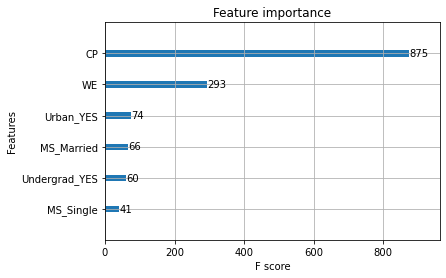

In [176]:
plot_importance(model_x)
pyplot.show()

In [177]:
# cp city population is the main factor for the risk in income taxable.


rmse=mean_squared_error(y_test,predictions)

In [178]:
print("RMSE : % f%%"(rmse))

RMSE :  0.313131%


In [ ]:
#low mean squared error means perfect model or strong model.